the shape of training data is: (50000, 32, 32, 3) (50000, 1)
the shape of testing data is: (10000, 32, 32, 3) (10000, 1)
the range of features is: 0 to 255
the range of labels is: 0 to 99
label 1 is [19]
label 2 is [29]
label 3 is [0]
label 4 is [11]
label 5 is [1]
Epoch 1/30
50000/50000 [==============================] - 656s 13ms/step - loss: 3.3361 - categorical_accuracy: 0.2188 - top_k_categorical_accuracy: 0.4762
Epoch 2/30
50000/50000 [==============================] - 641s 13ms/step - loss: 2.6592 - categorical_accuracy: 0.3499 - top_k_categorical_accuracy: 0.6457
Epoch 3/30
50000/50000 [==============================] - 644s 13ms/step - loss: 2.4458 - categorical_accuracy: 0.3933 - top_k_categorical_accuracy: 0.6918
Epoch 4/30
50000/50000 [==============================] - 639s 13ms/step - loss: 2.2994 - categorical_accuracy: 0.4222 - top_k_categorical_accuracy: 0.7209
Epoch 5/30
50000/50000 [==============================] - 642s 13ms/step - loss: 2.1563 - categorical_accuracy

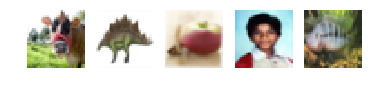

In [4]:
from __future__ import print_function                  # Allows for python3 printing
import keras
from keras.datasets import cifar100                   # import function to load cifar100 dataset
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

print ('the shape of training data is:',x_train.shape,y_train.shape)       #print data shape
print ('the shape of testing data is:',x_test.shape,y_test.shape)

import numpy as np
print ('the range of features is:',np.min(x_train),'to',np.max(x_train))
print ('the range of labels is:',np.min(y_train),'to',np.max(y_train))

import matplotlib.pyplot as plt

for i in range(5):
    image = x_train[i]
    plt.subplot(1,5, i+1)
#   image = image.reshape(64,64)
    print ('label', i+1, 'is',y_train[i])
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

# convert class vectors to binary class matrices
x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train[:,0], num_classes=100)
y_test = keras.utils.to_categorical(y_test[:,0], num_classes=100)

def ConvNet(num_classes=100):

    images = Input(shape=(32, 32, 3))           #use input shape that matches image size
    
    # Convolutional layers
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='elu')(images)  #conv layer1
    x = Dropout(0.1)(x)                     #dropout layer1
    
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='elu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(2, 2))(x)  #pooling layer2
    x = Dropout(0.25)(x)                #dropout layer1
    
    x = Conv2D(filters=128, kernel_size=(2, 2), activation='elu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(2, 2))(x)  #pooling layer2
    x = Dropout(0.35)(x)                     #dropout layer1

    # Fully-connected layer: 
    x = Flatten()(x)          
    x = Dense(200)(x)         #200 neurons fc layer
    x = Dense(units=num_classes, activation='softmax')(x)

    # Instantiate a model based on inputs/outputs
    model = Model(inputs=images, outputs=x)

    # Configure the model for training. 
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizers.Adam(),
            metrics=[
                'categorical_accuracy',
                keras.metrics.top_k_categorical_accuracy])

    return model

model = ConvNet()
model.fit(
        x=x_train,
        y=y_train,
        epochs=30,
        shuffle=True)

train_score = model.evaluate(x_train, y_train)       # evaluate model on training dataset
test_score = model.evaluate(x_test, y_test)          # evaluate model on testing dataset

print ('\n')                                         # start from a new line      
print('Training accuracy:', train_score[1])          # print out training accuracy
print('Testing accuracy:', test_score[1])            # print out testing accuracy